In [3]:
from badge_data_analysis import preprocessing
from badge_data_analysis import plot
%matplotlib inline

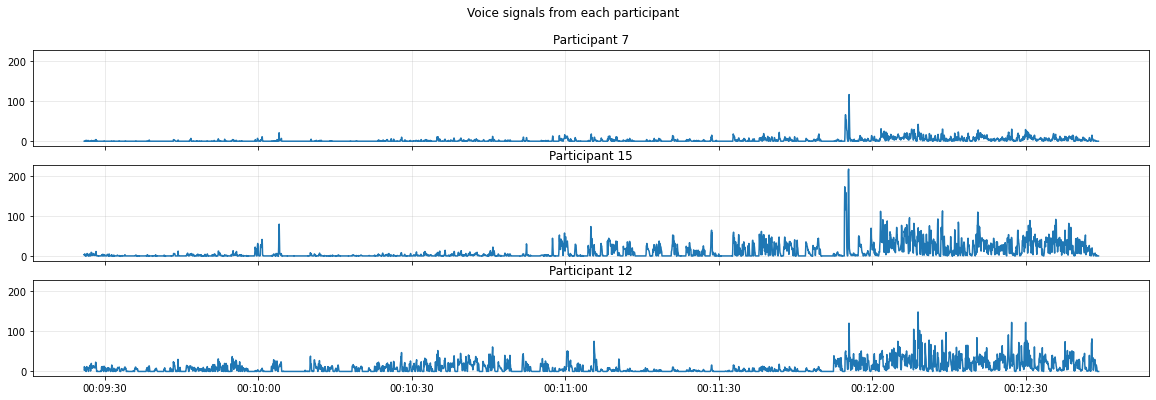

In [4]:
filename = 'data/audio_data_test_1.txt'

data = preprocessing.read_file(filename)
data = preprocessing.fix_time_jumps(data)
data = preprocessing.truncate(data)
data = preprocessing.remove_offset(data)

fig, axes = plot.signals(data)